Euclidean distance - Accuracy: 0.33 (+/- 0.01)
Manhattan distance - Accuracy: 0.36 (+/- 0.01)


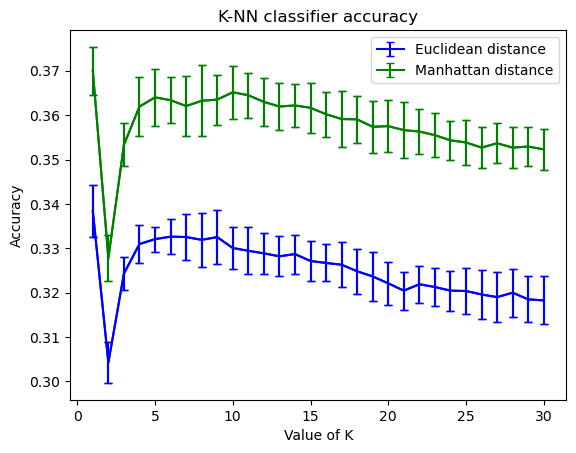

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Flatten images to 1-D array
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Create KNN classifiers with Euclidean and Manhattan distances
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')

# Train the models using K-fold cross-validation
kfold_scores_euclidean = cross_val_score(knn_euclidean, X_train, y_train.ravel(), cv=5)
kfold_scores_manhattan = cross_val_score(knn_manhattan, X_train, y_train.ravel(), cv=5)

# Print average accuracy of K-fold cross-validation
print("Euclidean distance - Accuracy: %0.2f (+/- %0.2f)" % (kfold_scores_euclidean.mean(), kfold_scores_euclidean.std() * 2))
print("Manhattan distance - Accuracy: %0.2f (+/- %0.2f)" % (kfold_scores_manhattan.mean(), kfold_scores_manhattan.std() * 2))

# Impact of changing K parameter in KNN algorithm on accuracy of classifier in K-fold cross-validation
k_range = range(1, 31)
k_to_accuracies_euclidean = {}
k_to_accuracies_manhattan = {}

for k in k_range:
    knn_euclidean = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn_manhattan = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    scores_euclidean = cross_val_score(knn_euclidean, X_train, y_train.ravel(), cv=5)
    scores_manhattan = cross_val_score(knn_manhattan, X_train, y_train.ravel(), cv=5)
    k_to_accuracies_euclidean[k] = scores_euclidean
    k_to_accuracies_manhattan[k] = scores_manhattan

# Plot the impact of changing K parameter on accuracy
k_choices = range(1, 31)
accuracies_mean_euclidean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies_euclidean.items())])
accuracies_std_euclidean = np.array([np.std(v) for k,v in sorted(k_to_accuracies_euclidean.items())])
accuracies_mean_manhattan = np.array([np.mean(v) for k,v in sorted(k_to_accuracies_manhattan.items())])
accuracies_std_manhattan = np.array([np.std(v) for k,v in sorted(k_to_accuracies_manhattan.items())])

plt.errorbar(list(k_to_accuracies_euclidean.keys()), accuracies_mean_euclidean, yerr=accuracies_std_euclidean, color='blue', capsize=3)
plt.errorbar(list(k_to_accuracies_manhattan.keys()), accuracies_mean_manhattan, yerr=accuracies_std_manhattan, color='green', capsize=3)

# Plot the trend line with error bars that correspond to standard deviation
plt.errorbar(list(k_to_accuracies_euclidean.keys()), accuracies_mean_euclidean, yerr=accuracies_std_euclidean, color='blue', capsize=3)
plt.errorbar(list(k_to_accuracies_manhattan.keys()), accuracies_mean_manhattan, yerr=accuracies_std_manhattan, color='green', capsize=3)

plt.title("K-NN classifier accuracy")
plt.xlabel("Value of K")
plt.ylabel("Accuracy")
plt.legend(["Euclidean distance", "Manhattan distance"])
plt.show()


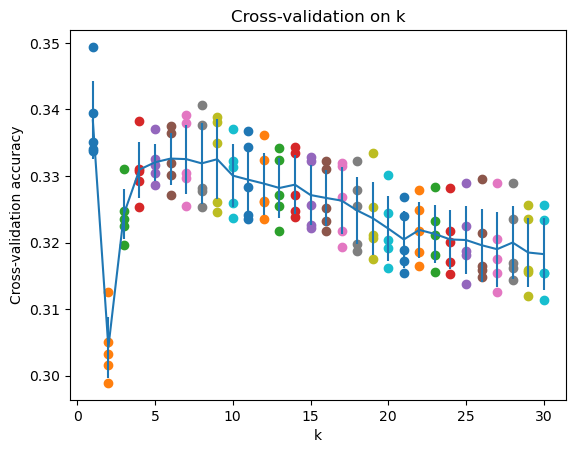

In [6]:
for k in k_choices:
    accuracies = k_to_accuracies_euclidean[k]
    plt.scatter([k] * len(accuracies), accuracies)

# plot the trend line with error bars that correspond to standard deviation

accuracies_mean_euclidean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies_euclidean.items())])
accuracies_std_euclidean = np.array([np.std(v) for k,v in sorted(k_to_accuracies_euclidean.items())])
plt.errorbar(k_choices, accuracies_mean_euclidean, yerr=accuracies_std_euclidean)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy for Euclidean')
plt.show()

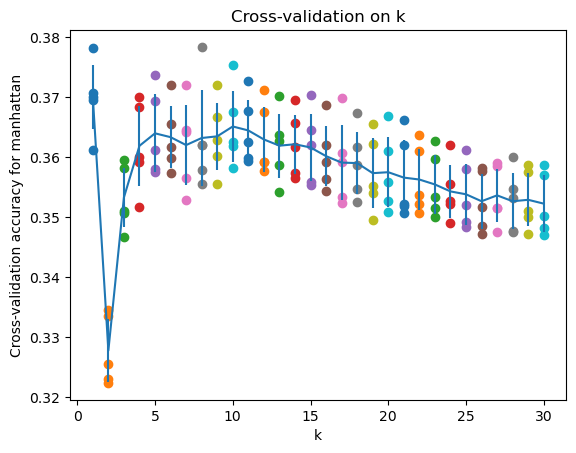

In [7]:
for k in k_choices:
    accuracies = k_to_accuracies_manhattan[k]
    plt.scatter([k] * len(accuracies), accuracies)

# plot the trend line with error bars that correspond to standard deviation

accuracies_mean_manhattan = np.array([np.mean(v) for k,v in sorted(k_to_accuracies_manhattan.items())])
accuracies_std_manhattan = np.array([np.std(v) for k,v in sorted(k_to_accuracies_manhattan.items())])
plt.errorbar(k_choices, accuracies_mean_manhattan, yerr=accuracies_std_manhattan)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy for manhattan')
plt.show()